In [1]:
# Option for Jupyter Notebook
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 180) # option for size of picture output  

# Compatmental Models

## Objectives

In this notebook, we are going to write recursive and differential equation model in R for Ecology.
A classical predator-prey model and a simple epidemiological model.
The idea is to introduce the language, the libraries for solving differential equations and plotting outputs. 

At some point, a <span style="color:red;font-size:15px;">Question?</span> mark is written, where questions follows.

## Number of branches on a tree

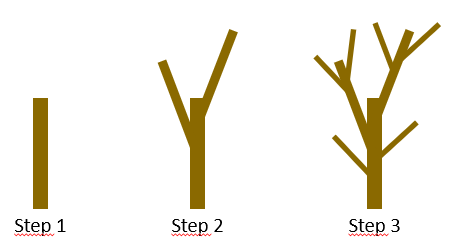



### Recursion equation

Using recursive equation, we can write the model as follow:

$$
B(t+1) = B(t) + b \times B(t)
$$

In [2]:
TreeBranch_Recursion = function(B, b){
    return(B+b*B)
}

In [3]:
TreeBranch_Recursion(1,2)

[1] 3

In [4]:
out = c(1) # init vector
for(i in 1:10){
   out = append(out, TreeBranch_Recursion(out[i],2))
}
out 

[1]     1     3     9    27    81   243   729  2187  6561 19683 59049

In [5]:
# -----------------------------------------------------------------------------
# Option for plots only require in Jupyter Notebook
par(cex.lab = 1.5, cex.axis = 1.0, cex.main = 1.5, cex.sub = 1.5)
par(mar = c(5,5,1,1), mgp = c(4, 1, 0))
# -----------------------------------------------------------------------------
plot(1:11, out, 
     type = "l",
     col = "blue", xlab = "Time", ylab = "Number of branches", las = 1)

### Differential equation

Using differential equation, the model of brach growth can be written like this:

$$
\frac{dB(t)}{dt} = b \times B(t)
$$

#### 1. load the library
The first step is to load the library to solve the ordinary differential equation. The library is [deSolve](https://desolve.r-forge.r-project.org/).

In [6]:
# Load the library for ordinary differential equation
library("deSolve")

#### 2. write the model

The second ste is to write the model. Here we define a function named `TreeBranch_ODE` which has three arguments:
* `t` the time varaible
* `B` the state of the model : variable that change with time
* `b` the parameters

In [7]:
TreeBranch_ODE <- function(t, B, b) {
    # model
    dB = b*B
    # output
    out = list(c(dB))
    return(out)
}

#### 3. setting parameterisation

We then have to fix all parameters of the model.
* `Time` : sequence of time
* `States` : the variables
* `Parameters` : the parameters

Note that here, the name of argument of `States` and `Parameters` have to be the same as those use in the model defiend at step 2.

In [8]:
Time       = seq(0, 10, by = 1)  # Time
State      = c(B = 1)               # Initial state of Variables
Parameters = c(b = log(2+1))        # Parameters

#### 4. Solving the model with its specific parameterization

In [9]:
# SOLVER : 
Out = ode(
    func = TreeBranch_ODE, # we give the model
    y = State, 
    parms = Parameters,
    times = Time)

#### 5. looking at the results

In [10]:
Out

time B           
 [1,]  0       1.000000
 [2,]  1       3.000008
 [3,]  2       9.000035
 [4,]  3      27.000131
 [5,]  4      81.000472
 [6,]  5     243.001656
 [7,]  6     729.005687
 [8,]  7    2187.019193
 [9,]  8    6561.063935
[10,]  9   19683.210807
[11,] 10   59049.689371

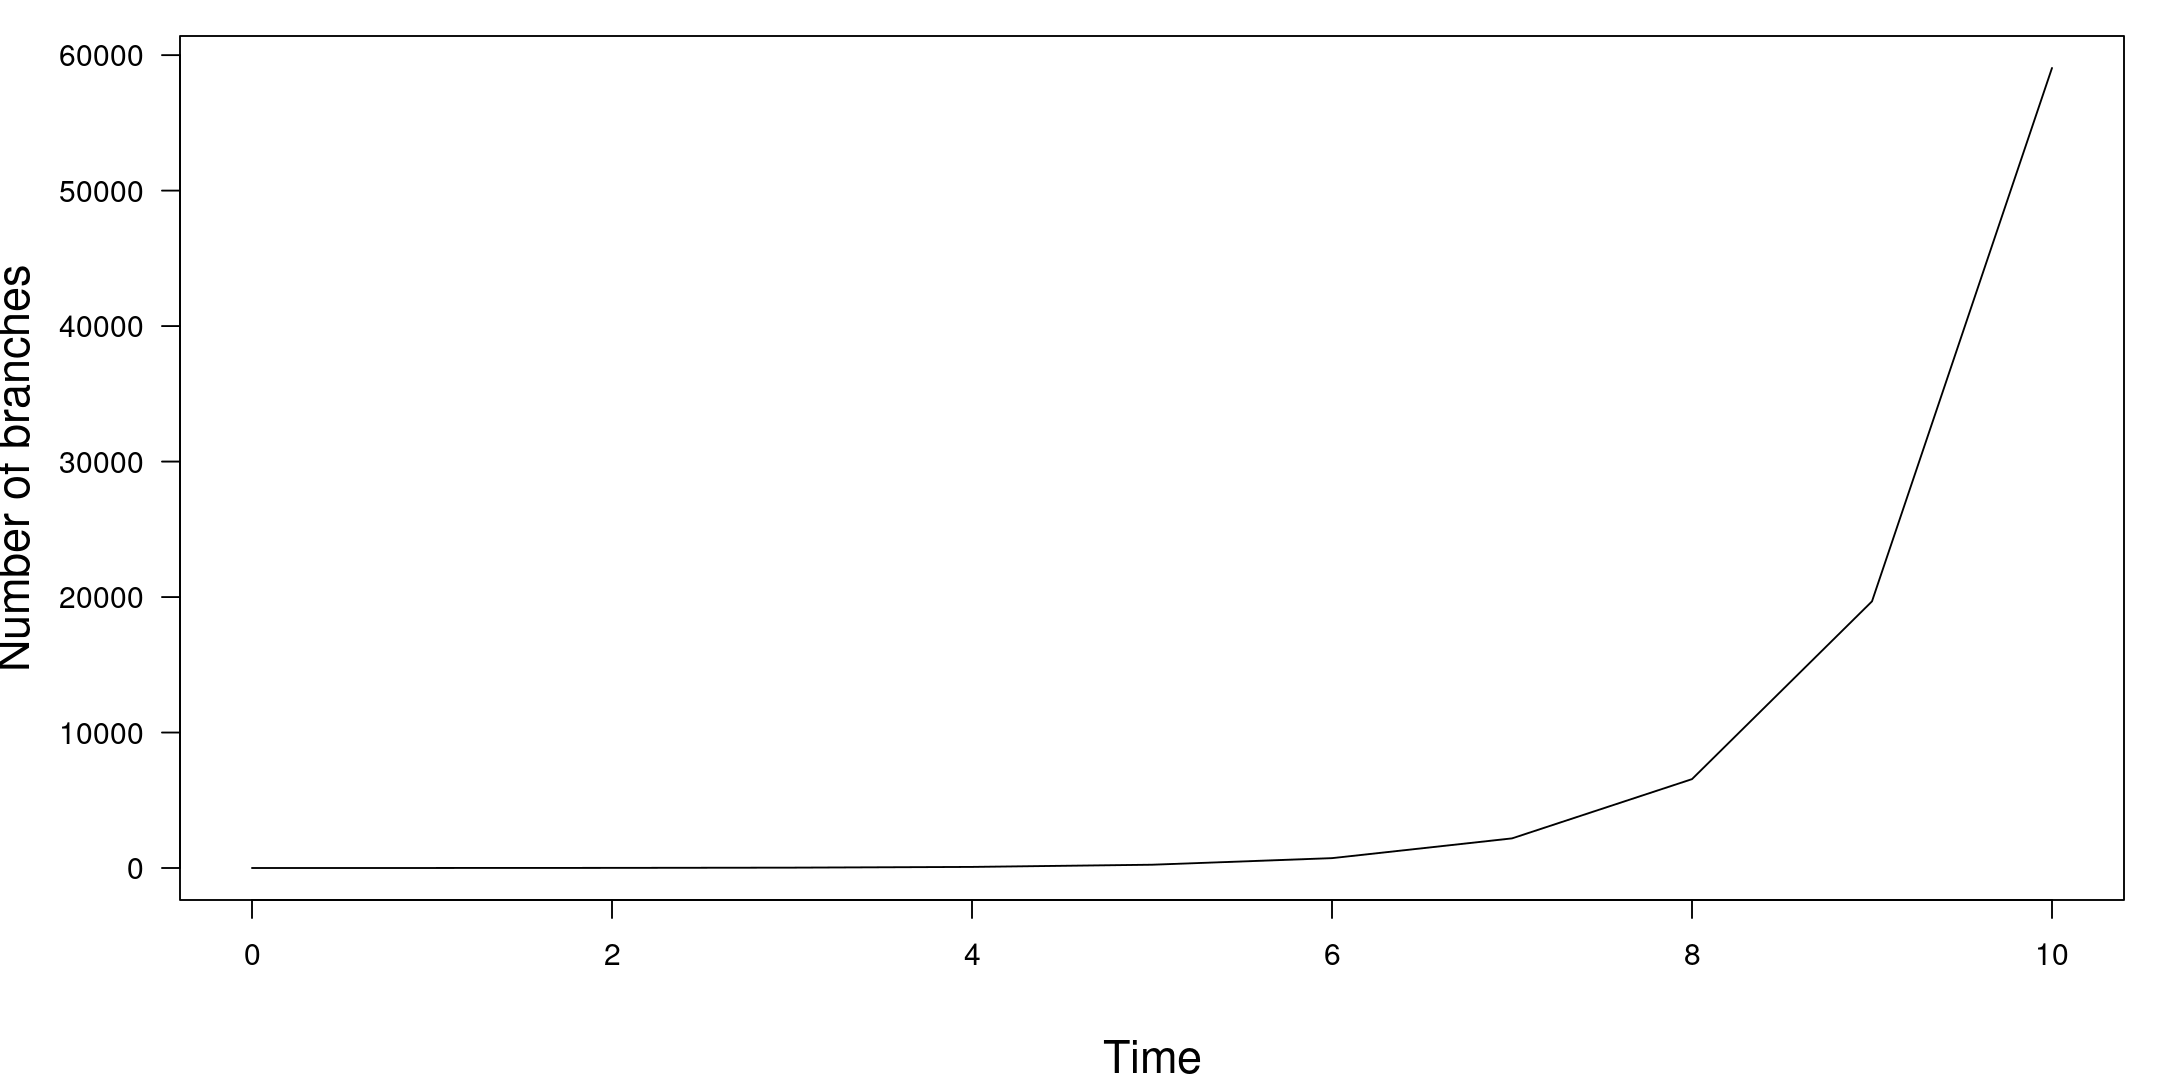

In [11]:
# -----------------------------------------------------------------------------
# Option for plots only require in Jupyter Notebook
par(cex.lab = 1.5, cex.axis = 1.0, cex.main = 1.5, cex.sub = 1.5)
par(mar = c(5,5,1,1), mgp = c(4, 1, 0))
# -----------------------------------------------------------------------------
plot(Out[,1], Out[,2], type = "l", xlab = "Time", ylab = "Number of branches", las = 1)

<span style="color:red;font-size:20px;">Question?</span>

* **Why the parameters `b` are different in the recursive model and the differential equation?**

We set b=2 in the recursive model and b=log(2+1), why ?

## Predation on mice

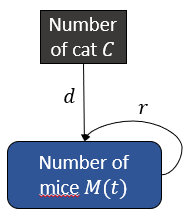


### Mice ODE model 

The equation is given by:

$$
\frac{dM(t)}{dt} = rM(t) - dCM(t)
$$

In [12]:
Mice_ODE <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dM = r*M - d*C*M
        return(list(c(dM)))
    })
}

### Parameterization

In [13]:
Par <- c(r = log(2+1), d = log(1.5+1), C=1)
State <- c(M = 200)
Time <- seq(0, 10, by = 0.01)
out <- as.data.frame(ode(func = Mice_ODE, y = State, parms = Par, times = Time))

### Graphics

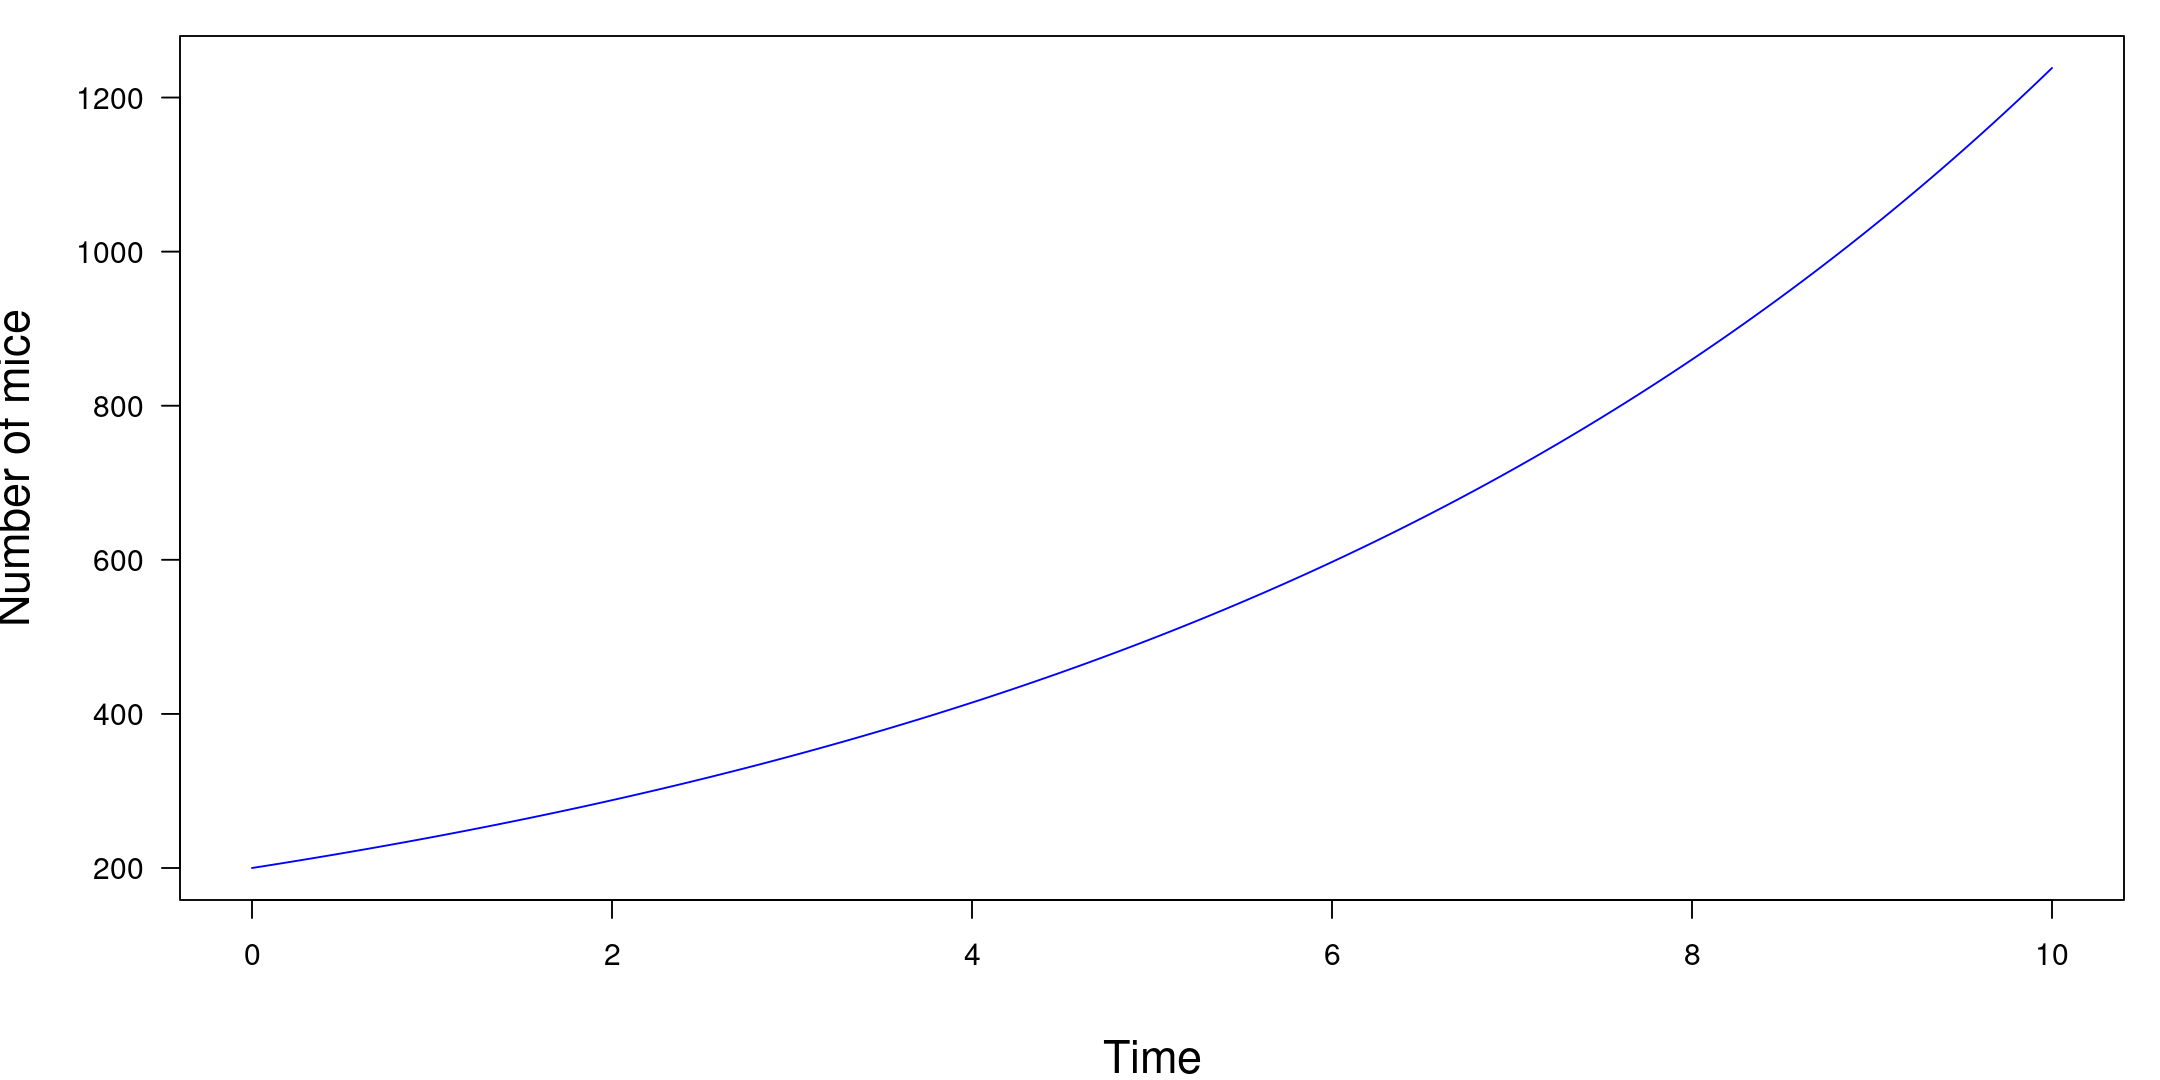

In [14]:
# -----------------------------------------------------------------------------
# Option for plots only require in Jupyter Notebook
par(cex.lab = 1.5, cex.axis = 1.0, cex.main = 1.5, cex.sub = 1.5)
par(mar = c(5,5,1,1), mgp = c(4, 1, 0))
# -----------------------------------------------------------------------------
plot(out$time, out$M, type = "l", col = "blue", xlab = "Time", ylab = "Number of mice", las = 1)

## Lotka-Volterra

The Lotka-Volterra model is given by 2 ODEs with the following variables and parameters:

* $R$: resource (prey)
* $C$: consumer (predator)
* $\alpha$: reproduction rate of the prey
* $\beta$: functional response = predation rate
* $\delta$: conversion efficiency from consumption to newborn
* $\gamma$: death rate of predator

The model is given by the set of equations:

$$
\begin{cases}
\dfrac{dR}{dt} = \alpha R - \beta R C\\[3mm]
\dfrac{dC}{dt} = \delta C R - \gamma C
\end{cases}\,.
$$

### Exercise LV

<span style="color:red;font-size:20px;">Question?</span> 

* **Implement Lotka Volterra**

In [15]:
LV_model <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dR = # EQUATION OF THE PREY
        dC = # EQUATION OF THE PREDATOR
        return(list(c(dR, dC)))
    })
}

In [16]:
###############################################################################
# SOLUTION
LV_model <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dR = alpha * R - beta * R * C
        dC = delta * C * R - gamma * C
        return(list(c(dR, dC)))
    })
}
###############################################################################

For the following parameterization, you can imagine that we re-scaled parameters to have prey and predator in the same order of magnitude.
It's something oftenly used to help the ODE solver

In [17]:
T_LV <- seq(0, 10, by = 0.01)
P_LV <- c(alpha = 1.5, beta = 1, delta = 1, gamma = 3)
U_LV <- c(R = 1, C = 1)

In [18]:
out_LV <- ode(func = LV_model, y = U_LV, parms = P_LV, times = T_LV)

### Plot using "ggplot2"

The library `ggplot2` is very well known in R and is nowadays a standard to plot graphics in data science. 
Many graphics libraries in Julia, Python, and Javascript use the idea of Grammar of Graph (gg) to make plots.

Here, we introduce this library which is based on DataFrame. A data frame is a table, where column have names and every column as the same number of lines.

In [19]:
library("ggplot2")

In [20]:
# convert the output of the solver to a `dataframe`
df_LV = as.data.frame(out_LV)

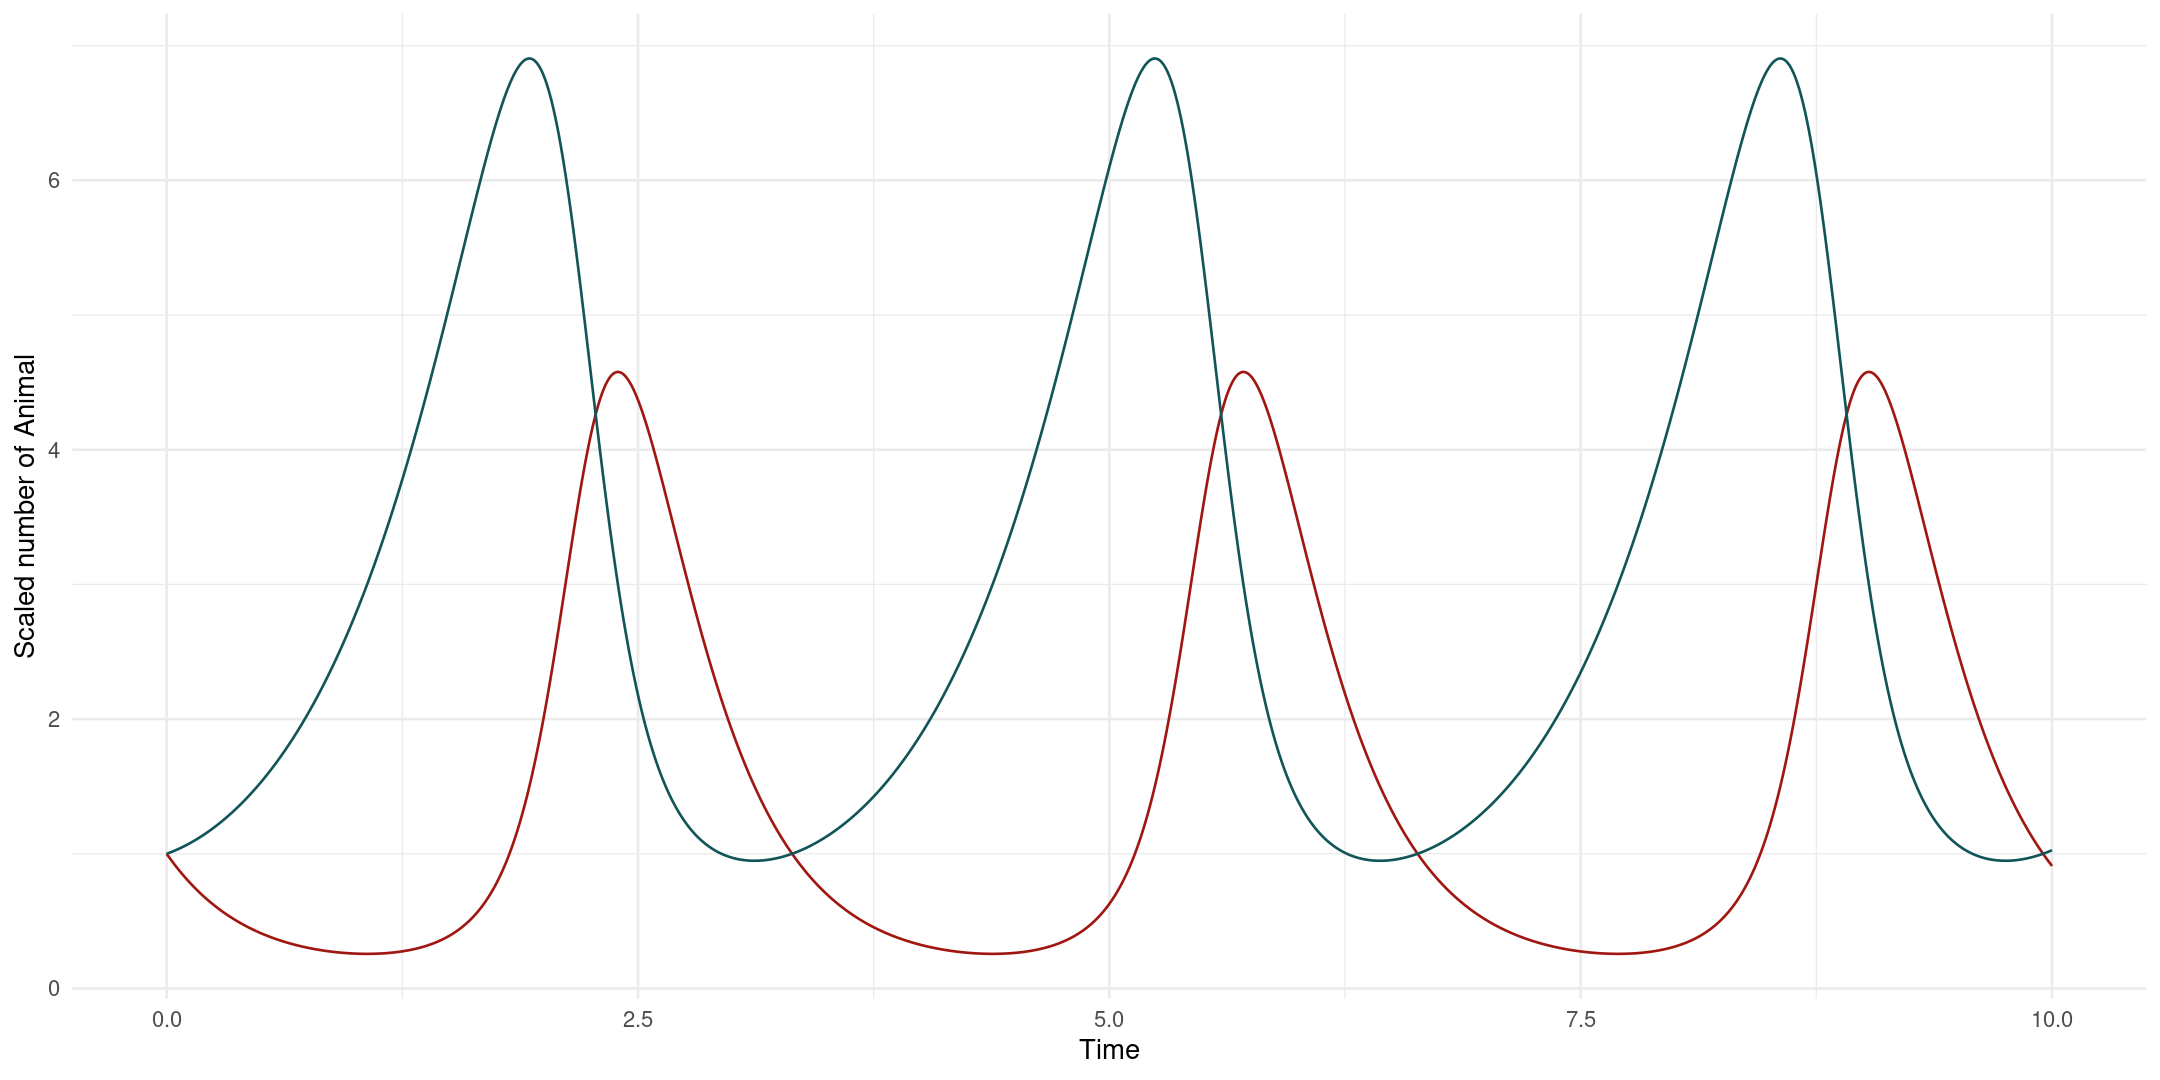

In [21]:
ggplot() +
    theme_minimal() +
    geom_line(aes(x = df_LV$time, y = df_LV$C), color = "#a01711") + 
    geom_line(aes(x = df_LV$time, y = df_LV$R), color = "#115558") +
    labs(x = "Time", y = "Scaled number of Animal")

## SI model

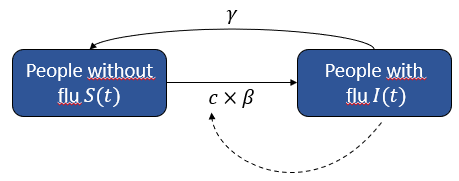


### SI ODE model

$$
\begin{cases}
\dfrac{dS}{dt} = \gamma I - cI \beta S\\[3mm]
\dfrac{dI}{dt} = cI \beta S - \gamma I
\end{cases}\,.
$$


In [22]:
SI_ODE <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dS = gamma*I - c*beta*I*S
        dI = c*beta*I*S - gamma*I
        return(list(c(dS, dI)))
    })
}

In [23]:
Par <- c(gamma=0.5 , c=1 , beta=0.02)
State <- c(S=200, I=1)
Time <- seq(0, 10, by = 0.01)
out <- as.data.frame(ode(func = SI_ODE, y = State, parms = Par, times = Time))

In [24]:
head(out)

time S        I       
1 0.00 200.0000 1.000000
2 0.01 199.9644 1.035617
3 0.02 199.9275 1.072495
4 0.03 199.8893 1.110676
5 0.04 199.8498 1.150208
6 0.05 199.8089 1.191137

In [25]:
df_SI = data.frame(
    Time = rep(out$time, 2),
    Variables = rep(c('Susceptible','Infected'), each=nrow(out)),
    Values = c(out$S, out$I))

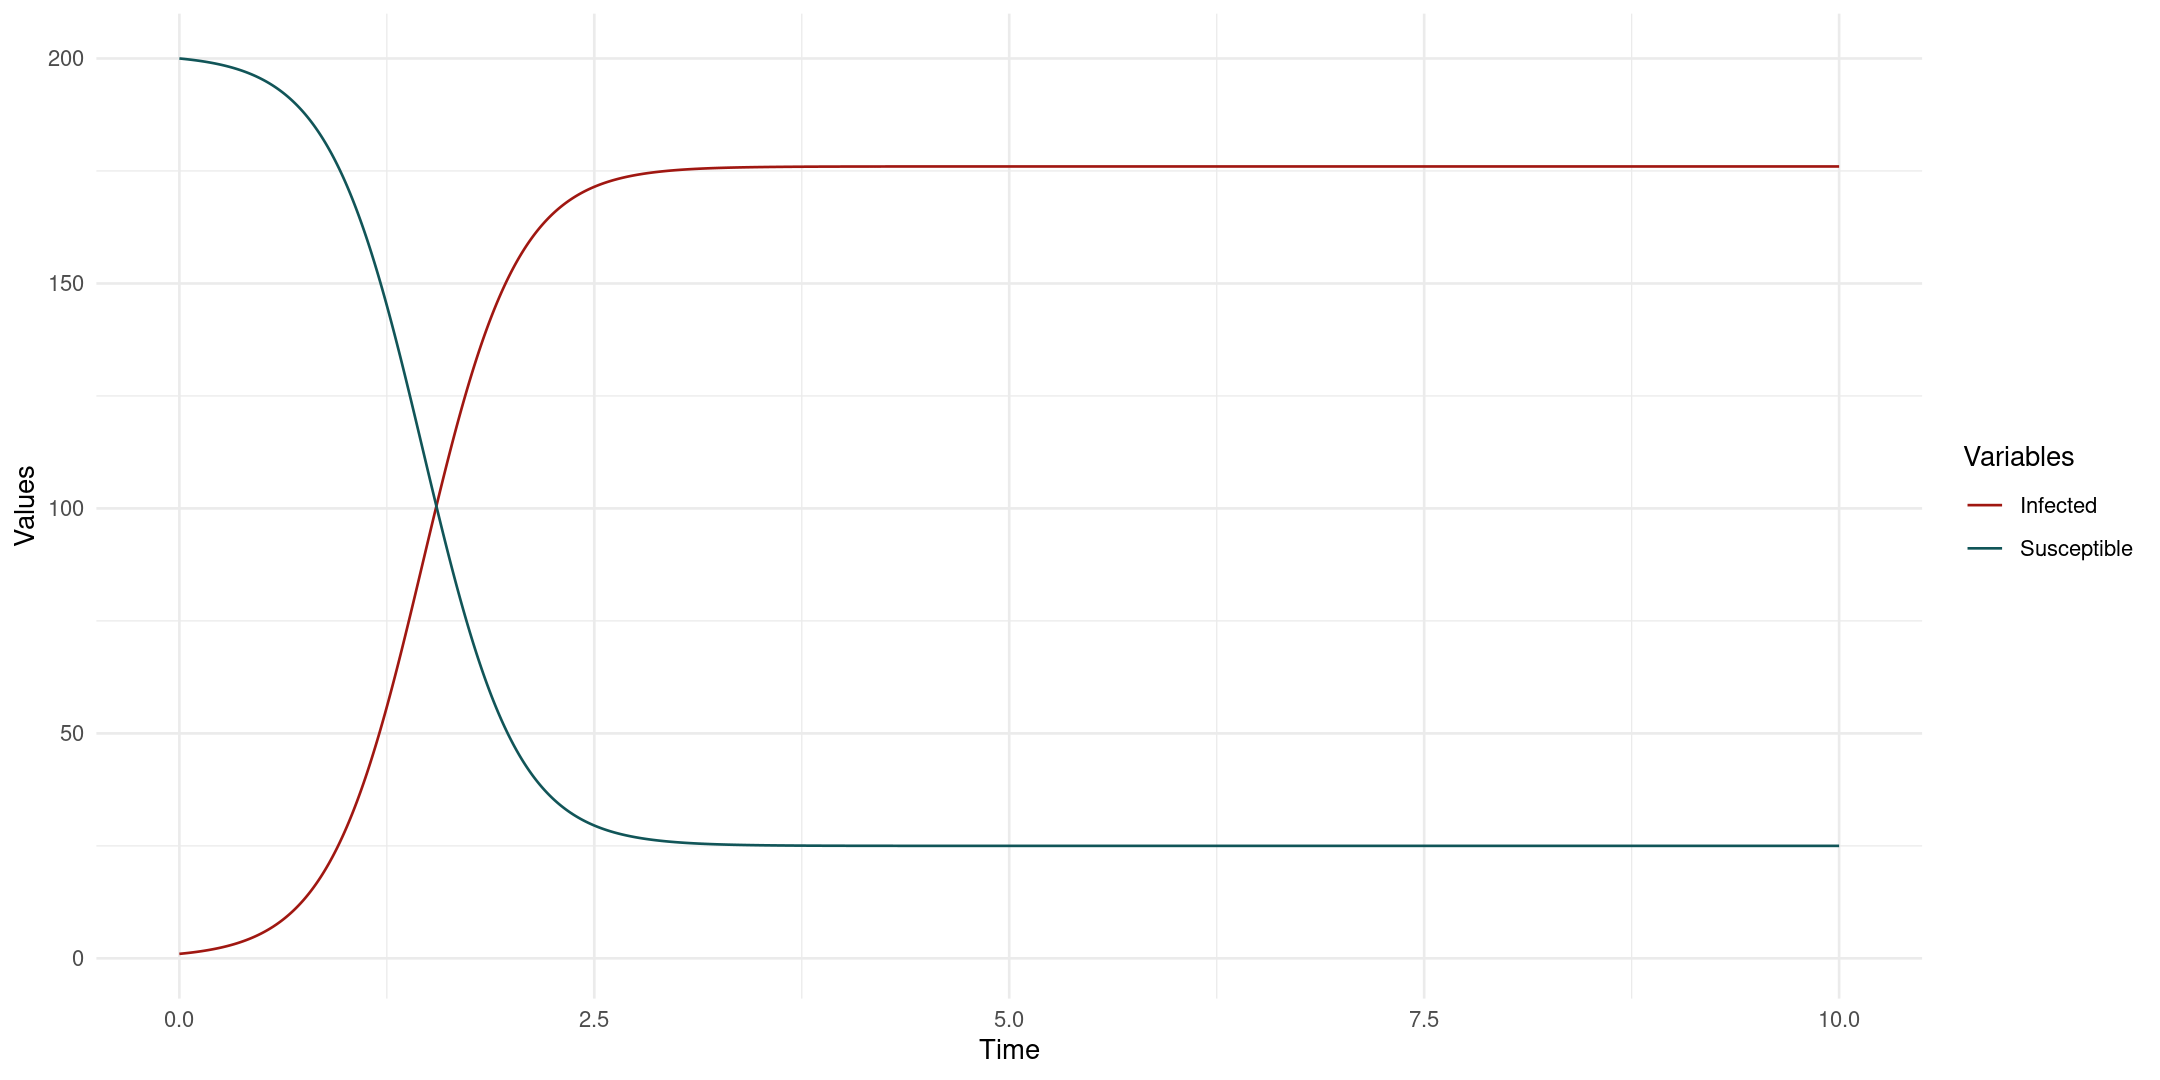

In [26]:
ggplot(data = df_SI) +
    theme_minimal() +
    scale_color_manual(values = c("#a01711", "#115558")) +
    geom_line(aes(x = Time, y = Values, color = Variables))

### Exercise SI

<span style="color:red;font-size:20px;">Question?</span> 

**Plot the phase diagram**
    
Note: Rather than ploting Infected and Susceptible as a function of time, a phase diagram plot Susceptible and Infected on the same graph. (It's not the sexiest phase diagram).

In [27]:
# The following commented code is the solution. Just replace the "????"

# ggplot(data = out) +
#    theme_minimal() +
#    scale_color_gradient(low = "#115568",  high = "#a01711") +
#    geom_line(aes(x = ????, y = ????, color = time), alpha = 0.5)

### Basic Reproductive Number

$$
R_0 = \frac{\beta N}{\gamma}
$$

In [28]:
Rnought = function(N, beta, gamma){
    return(beta*N/gamma)
}

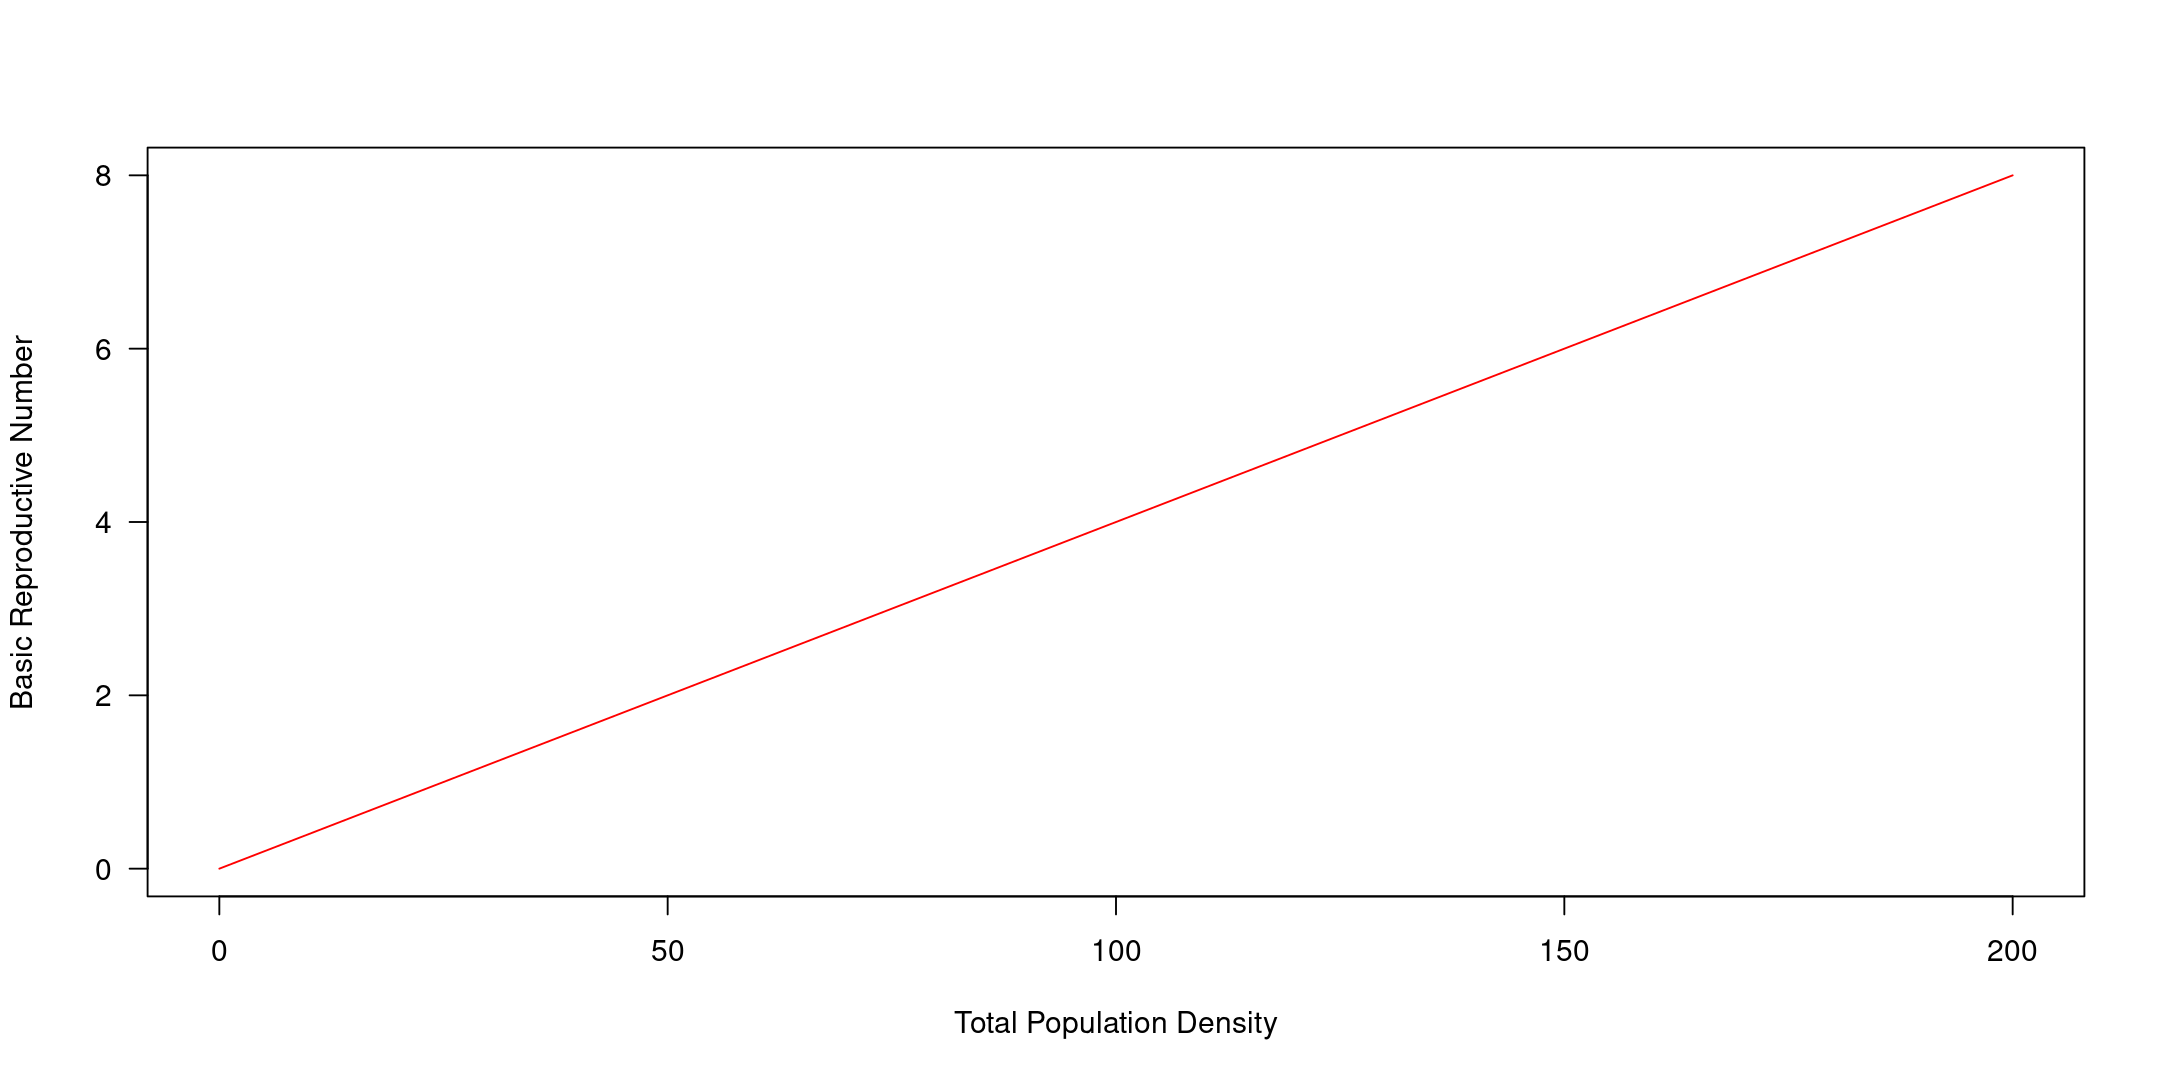

In [29]:
N = 0:200
par = as.list(Par)
plot(N, Rnought(N, par$beta, par$gamma),
    type = "l", xlab = "Total Population Density", ylab = "Basic Reproductive Number", las = 1, col = "red")

### SI Sensitivity Analysis

using only frequency, (removing the dependency on N), the $R_0$ is given by:

$$
R_0 = \frac{\beta}{\gamma}
$$

We want to explore how $R_0$ change with change in the parameter $\beta$ and $\gamma$.

In [30]:
RnoughtFreq = function(beta, gamma){
    return(beta/gamma)
}

In [31]:
df_SA = expand.grid(
    beta = seq(1,10,by=.1),
    gamma = seq(1,10,by=.1))
df_SA['R0'] = with(df_SA, RnoughtFreq(beta, gamma))
 
# Heatmap 
ggplot(df_SA, aes(beta, gamma, fill= R0)) + 
    theme_minimal() + 
    scale_fill_gradient(low = "blue", high = "red") +
    geom_tile()

## SI model with vaccination

Let say, we introduction a vaccinated class of individuals `V` with rate `delta`from Susceptible to Vaccinated.
The model is then given by :

$$
\begin{cases}
\dfrac{dS}{dt} = \gamma I - \beta S I - \delta S \\[3mm]
\dfrac{dI}{dt} = \beta S I - \gamma I \\[3mm]
\dfrac{dV}{dt} = \delta S
\end{cases}
$$

The basic reproductive number (R0) is then given by:

$$
R_0 = \dfrac{\beta}{\gamma + \delta}
$$

### Exercise SIV

<span style="color:red;font-size:20px;">Question?</span> 

* **Implement the model**
* **Explore the sensitivity of R0 with the vaccination**